## Importación de bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                  
sns.set_context("paper", font_scale = 1.6)  # Tamaño de fuente en el contexto de un "paper"

In [3]:
def graficar_simple(experimento, sentido):
    global t_pasos, promedio, error
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"ab" : "$\\langle \\mathcal{T}_{A \\rightarrow B} \\rangle$",
                         "ba" : "$\\langle \\mathcal{T}_{B \\rightarrow A} \\rangle$",
                         "cd" : "$\\langle \\mathcal{T}_{C \\rightarrow D} \\rangle$",
                         "dc" : "$\\langle \\mathcal{T}_{D \\rightarrow C} \\rangle$",
                         "ce" : "$\\langle \\mathcal{T}_{C \\rightarrow E} \\rangle$",
                         "ec" : "$\\langle \\mathcal{T}_{E \\rightarrow C} \\rangle$",}
    plt.figure(figsize = (20, 6))
    plt.plot(tiempo, promedio[experimento][sentido], "o--")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[sentido])
    plt.savefig("graficas/entropia/" + experimento + "_" + sentido + ".pdf", bbox_inches = "tight")
    plt.show()

In [4]:
def graficar_diferencia(experimento, diferencia, por_pasos = True):
    global t_pasos, promedio_diferencias
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"ab-ba" : "$\\langle \\mathcal{T}_{A \\rightarrow B} - \\mathcal{T}_{B \\rightarrow A} \\rangle$",
                         "ba-ab" : "$\\langle \\mathcal{T}_{B \\rightarrow A} - \\mathcal{T}_{A \\rightarrow B} \\rangle$",
                         "cd-dc" : "$\\langle \\mathcal{T}_{C \\rightarrow D} - \\mathcal{T}_{D \\rightarrow C} \\rangle$",
                         "dc-cd" : "$\\langle \\mathcal{T}_{D \\rightarrow C} - \\mathcal{T}_{C \\rightarrow D} \\rangle$",
                         "ce-ec" : "$\\langle \\mathcal{T}_{C \\rightarrow E} - \\mathcal{T}_{E \\rightarrow C} \\rangle$",
                         "ec-ce" : "$\\langle \\mathcal{T}_{E \\rightarrow C} - \\mathcal{T}_{C \\rightarrow E} \\rangle$"}
    plt.figure(figsize = (20, 6))
    plt.plot(tiempo, promedio_diferencias[experimento][diferencia], "o--")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[diferencia])
    plt.savefig("graficas/entropia/" + experimento + "_" + diferencia + ".pdf", bbox_inches = "tight")
    plt.show()

## Ruta de archivos

In [5]:
ruta = "datos/caracter_entropia/"

## Tiempo

In [6]:
t = np.loadtxt("datos/base/tiempo_ets.csv")
t_pasos = np.loadtxt("datos/base/pasos_ets.csv")

## Inicialización de "metadatos"

In [7]:
sentidos = ["ab", "ba", "cd", "dc", "ce", "ec"]
diferencias = ["ab-ba", "ba-ab", "cd-dc", "dc-cd", "ce-ec", "ec-ce"]
experimentos = ["cattaneo", "guyer"]

## Inicialización de diccionarios

In [8]:
promedio = {}
promedio_diferencias = {}

## Lectura y organización de datos respecto a sus "metadatos"

In [9]:
for ex in experimentos:
    promedio[ex] = {}
    for sen in sentidos:
        promedio[ex][sen] = np.loadtxt(ruta + "promedio_" + ex + "_" + sen + ".csv")
    
    promedio_diferencias[ex] = {}
    for dif in diferencias:
        promedio_diferencias[ex][dif] = np.loadtxt(ruta + "promedio_" + ex + "_" + dif + ".csv")

## Proceso de graficación

Experimento:  cattaneo
Sentido:  ab


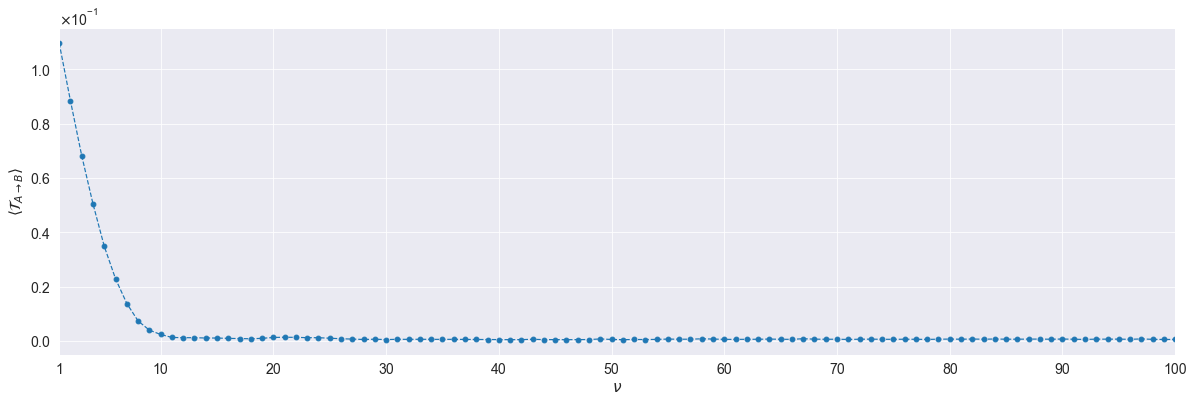

Experimento:  cattaneo
Sentido:  ba


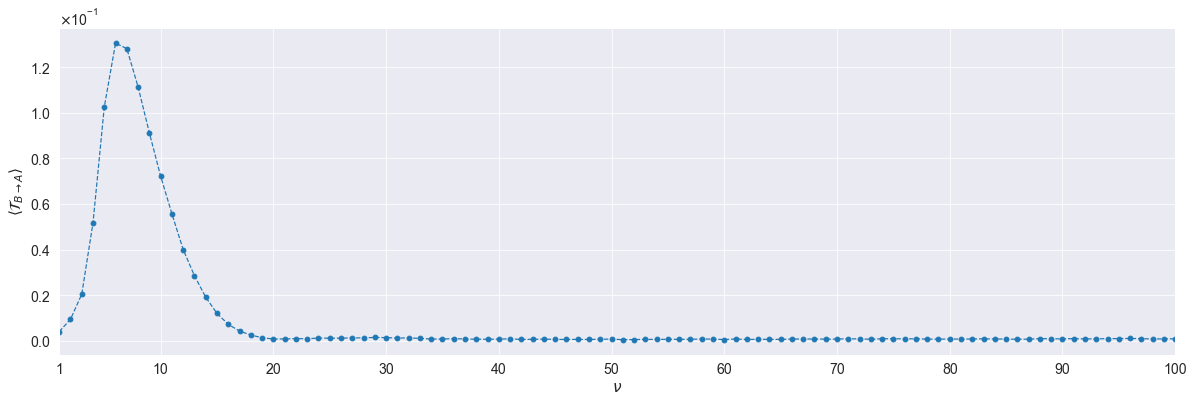

Experimento:  cattaneo
Sentido:  cd


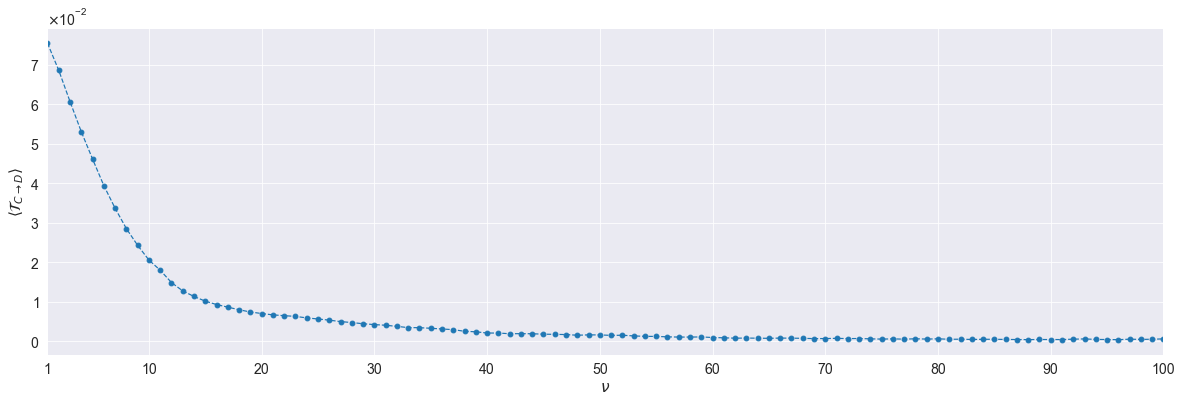

Experimento:  cattaneo
Sentido:  dc


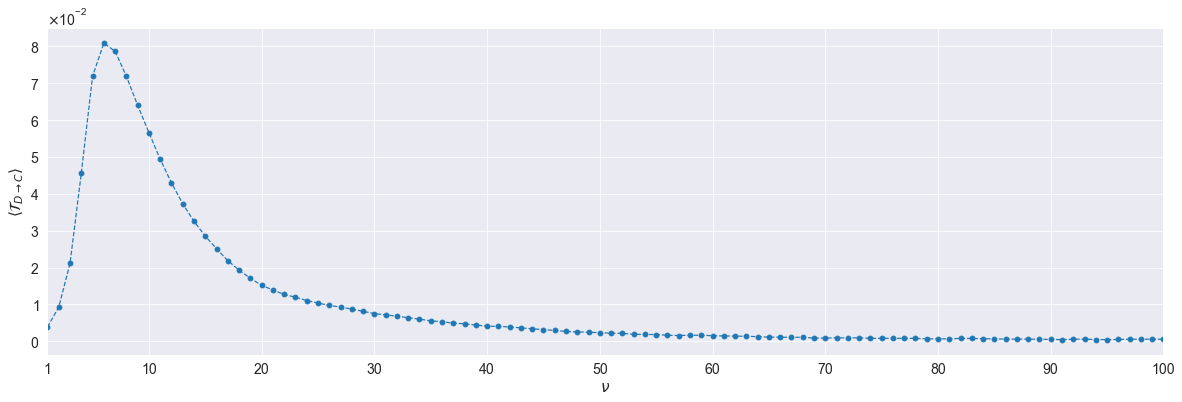

Experimento:  cattaneo
Sentido:  ce


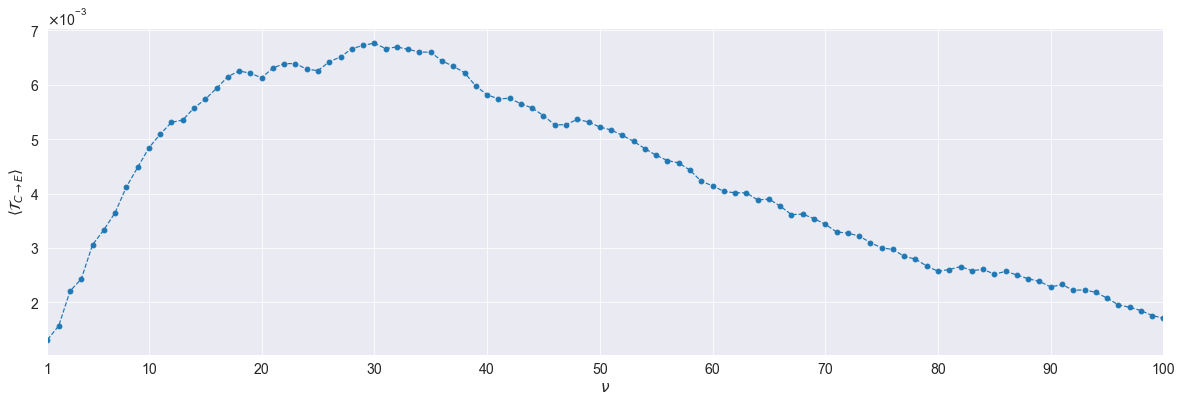

Experimento:  cattaneo
Sentido:  ec


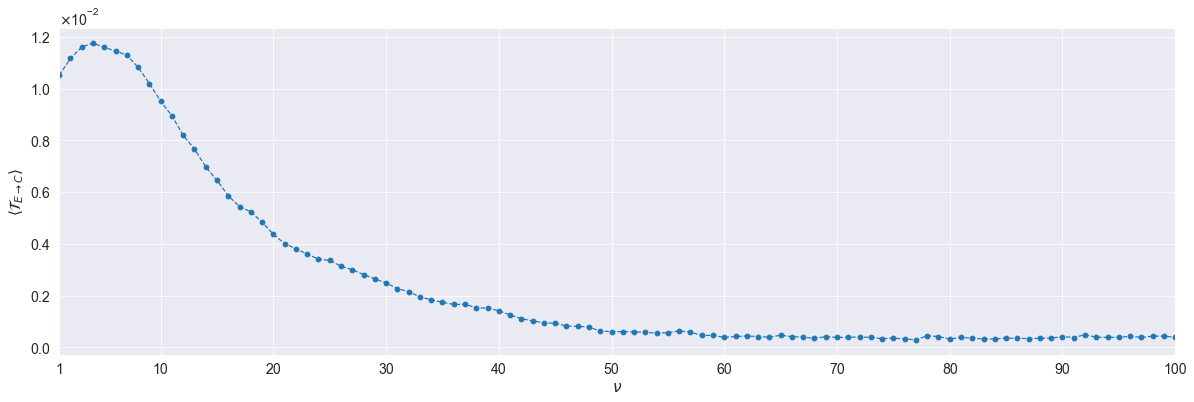

Experimento:  cattaneo
Diferencia:  ab-ba


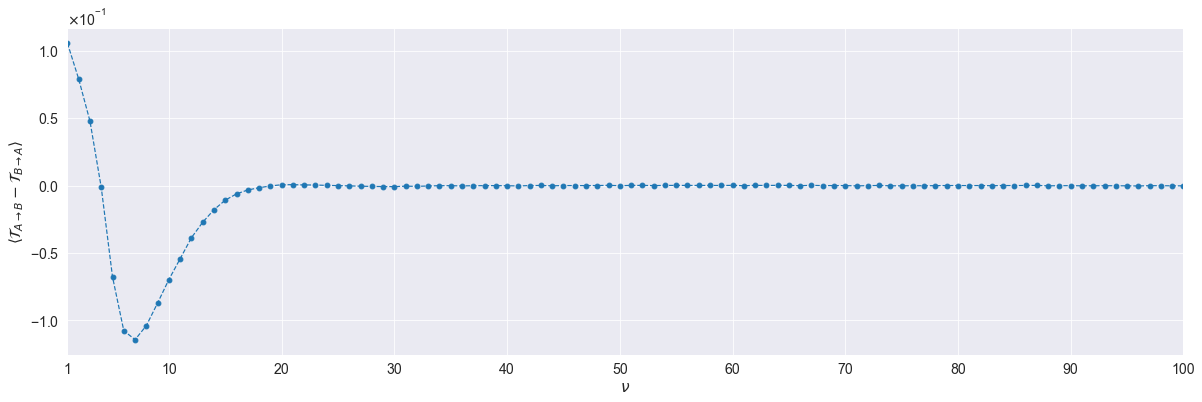

Experimento:  cattaneo
Diferencia:  ba-ab


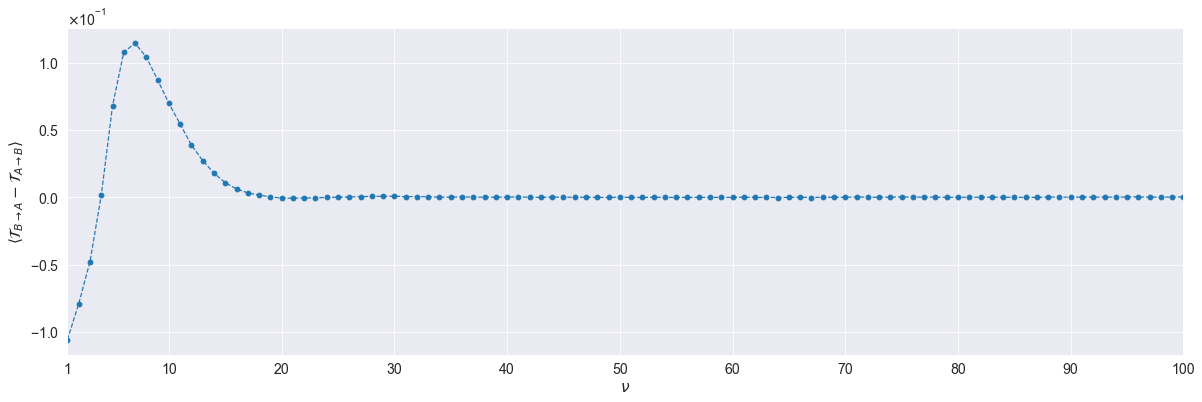

Experimento:  cattaneo
Diferencia:  cd-dc


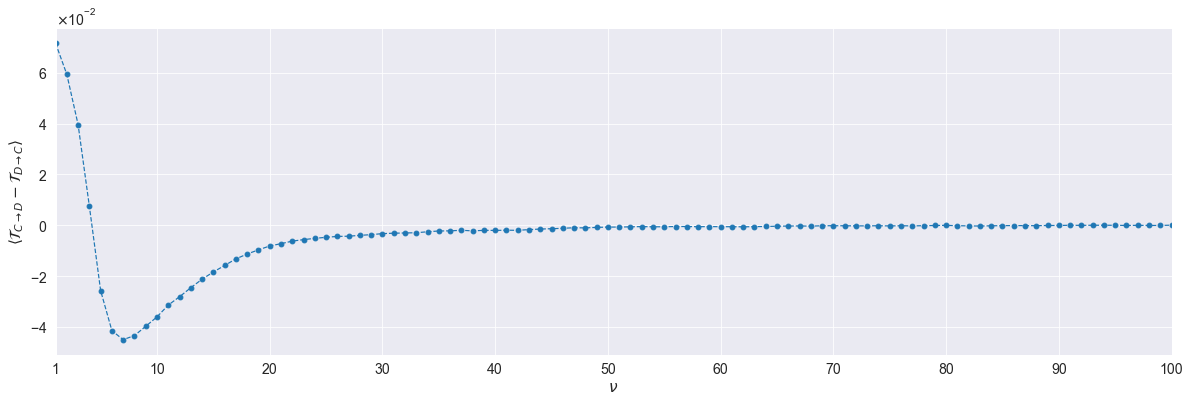

Experimento:  cattaneo
Diferencia:  dc-cd


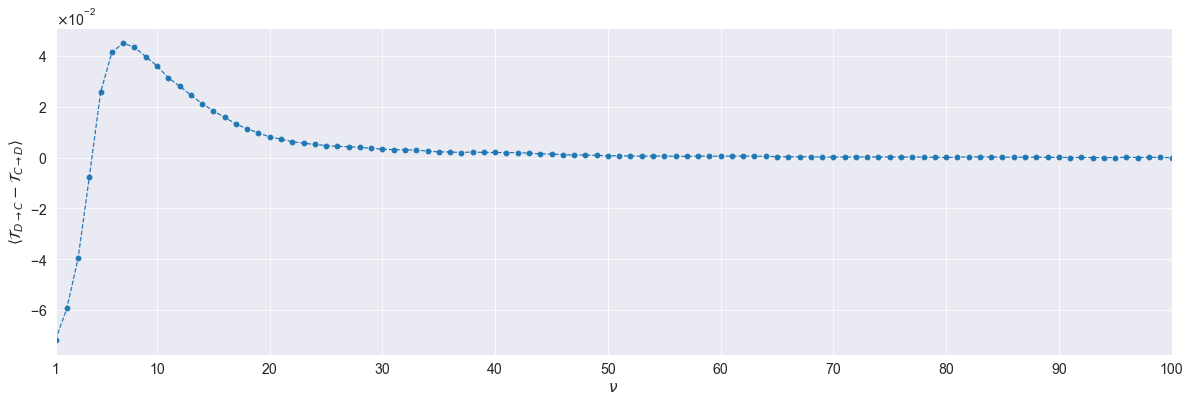

Experimento:  cattaneo
Diferencia:  ce-ec


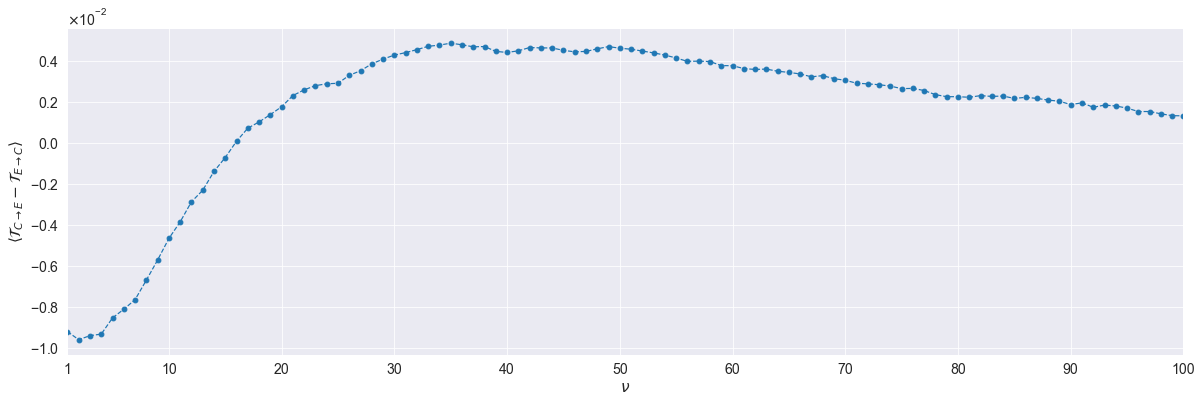

Experimento:  cattaneo
Diferencia:  ec-ce


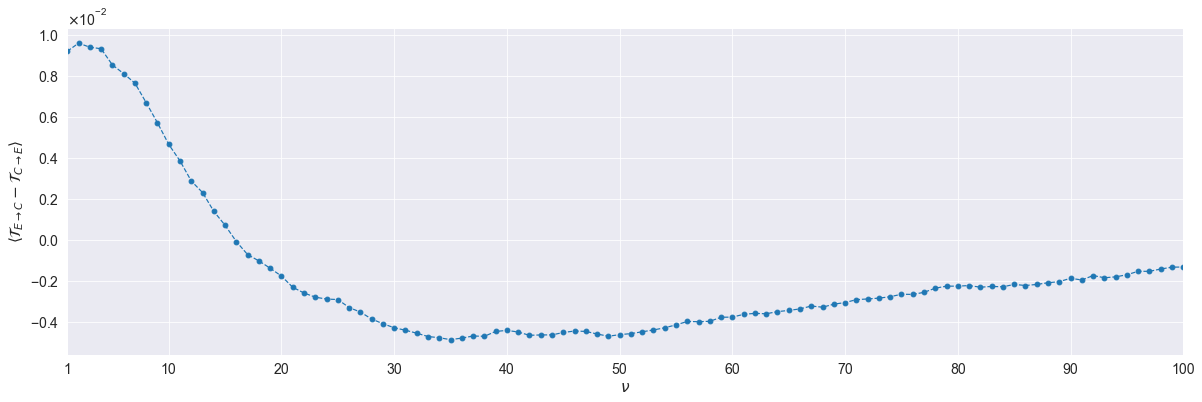

Experimento:  guyer
Sentido:  ab


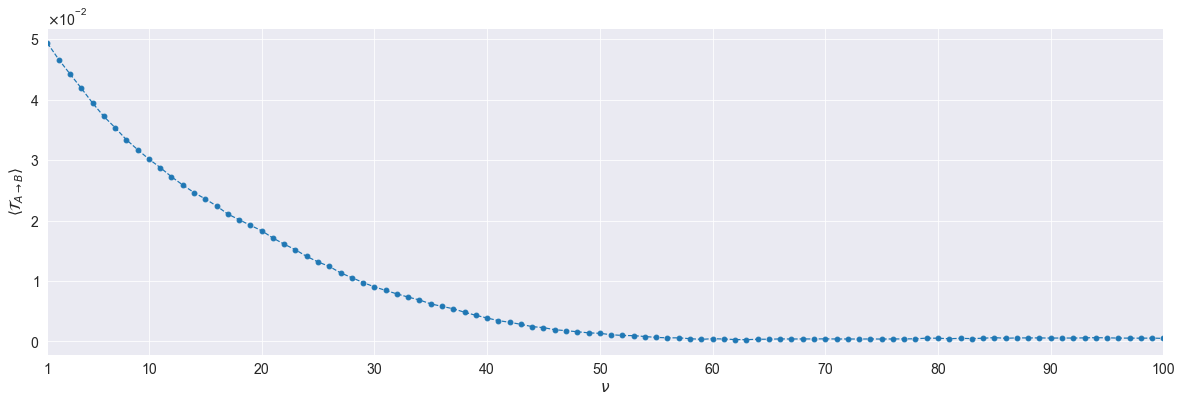

Experimento:  guyer
Sentido:  ba


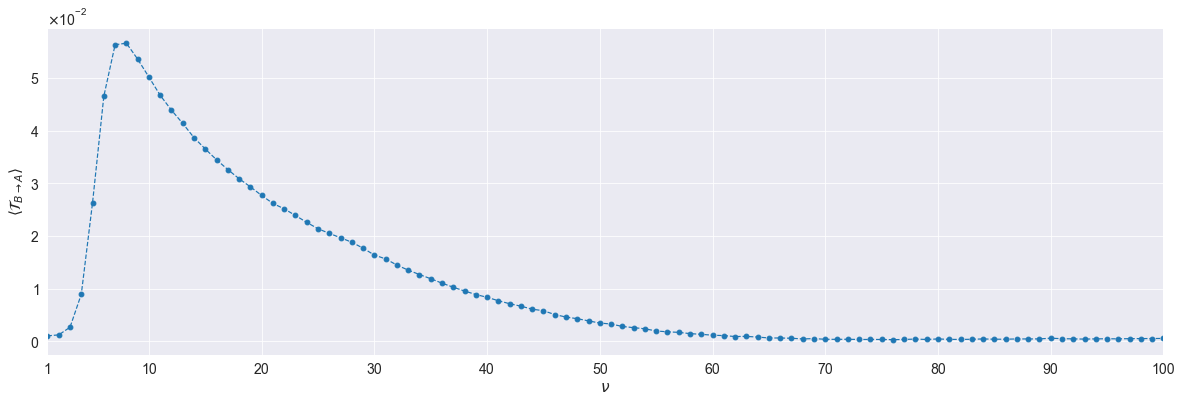

Experimento:  guyer
Sentido:  cd


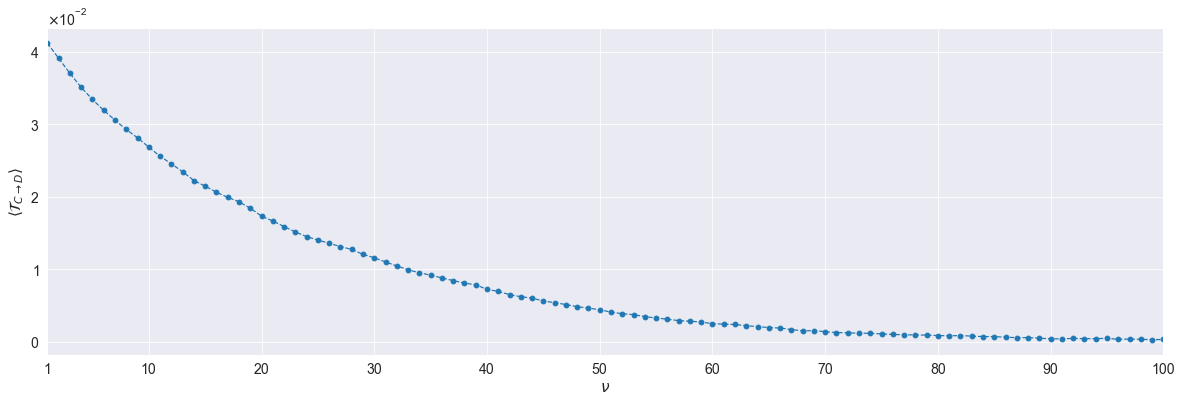

Experimento:  guyer
Sentido:  dc


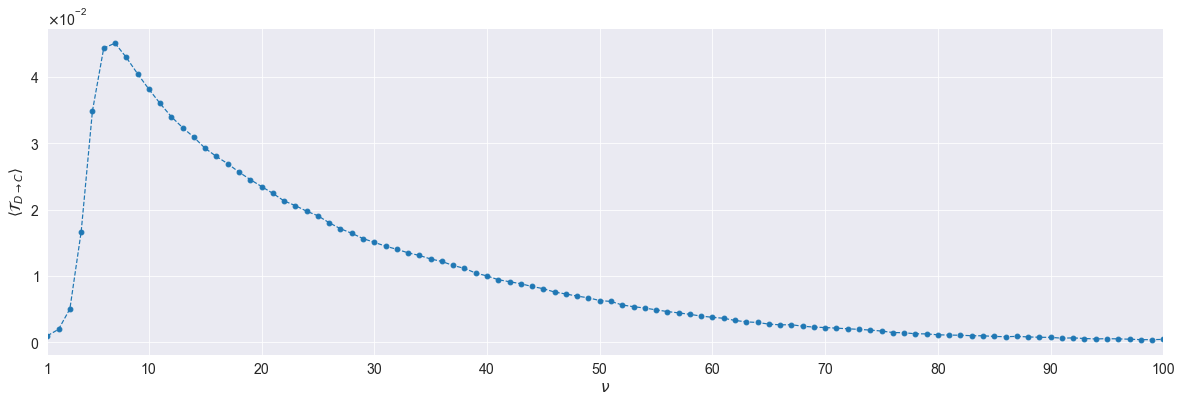

Experimento:  guyer
Sentido:  ce


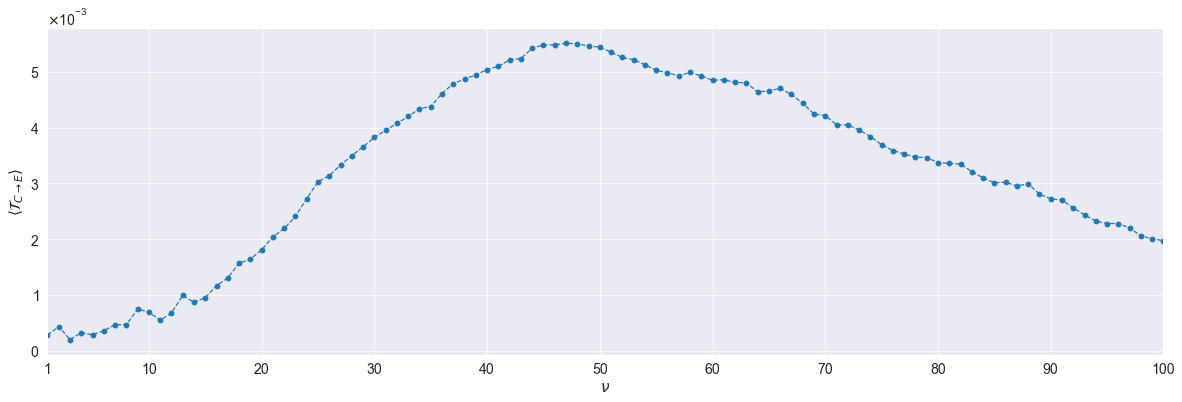

Experimento:  guyer
Sentido:  ec


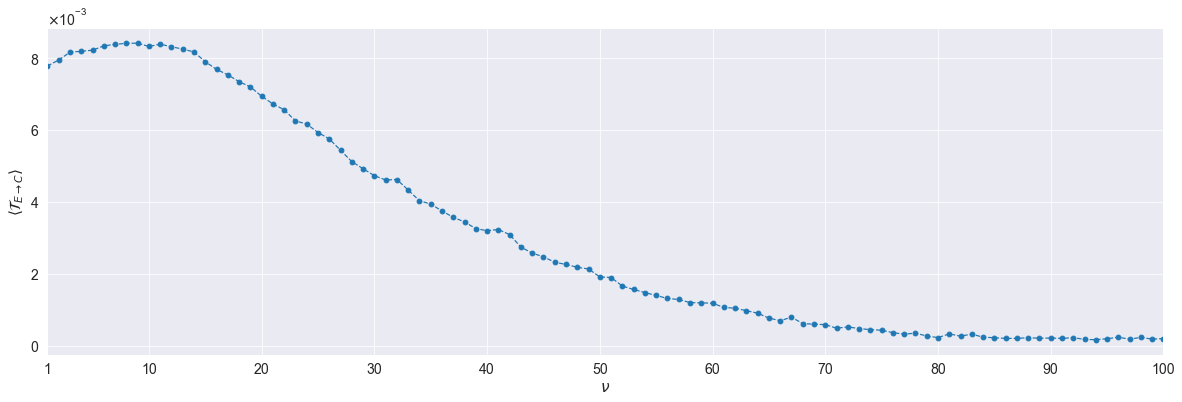

Experimento:  guyer
Diferencia:  ab-ba


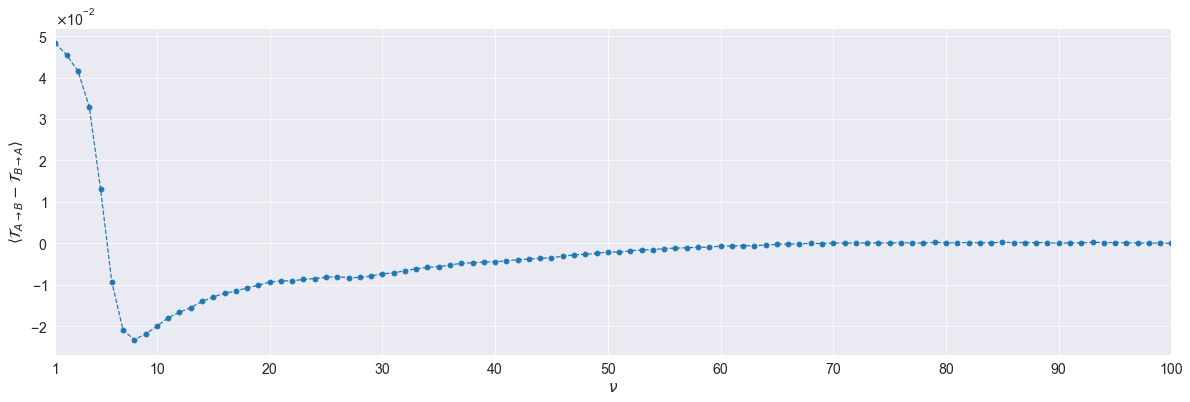

Experimento:  guyer
Diferencia:  ba-ab


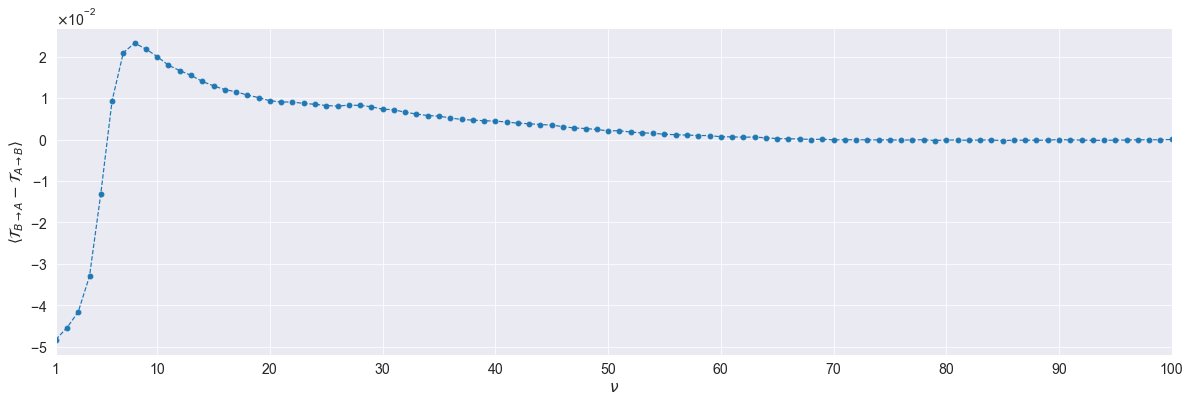

Experimento:  guyer
Diferencia:  cd-dc


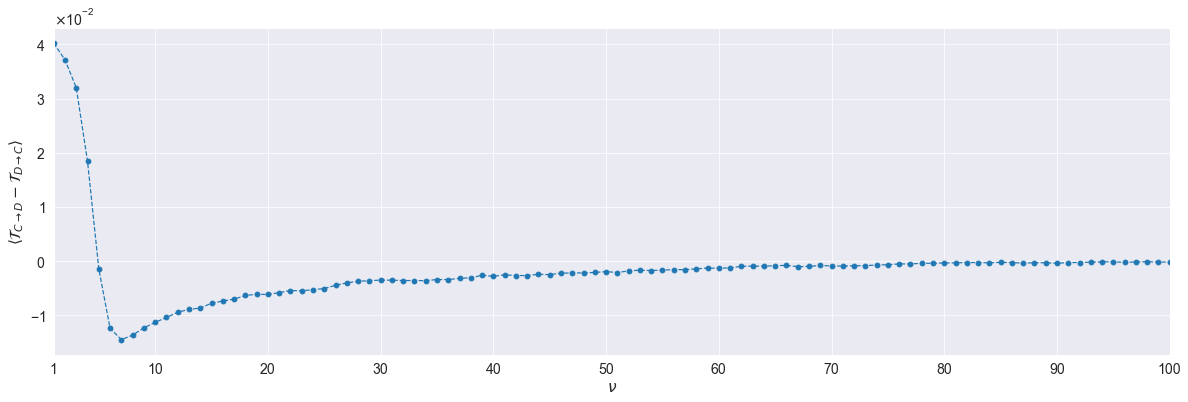

Experimento:  guyer
Diferencia:  dc-cd


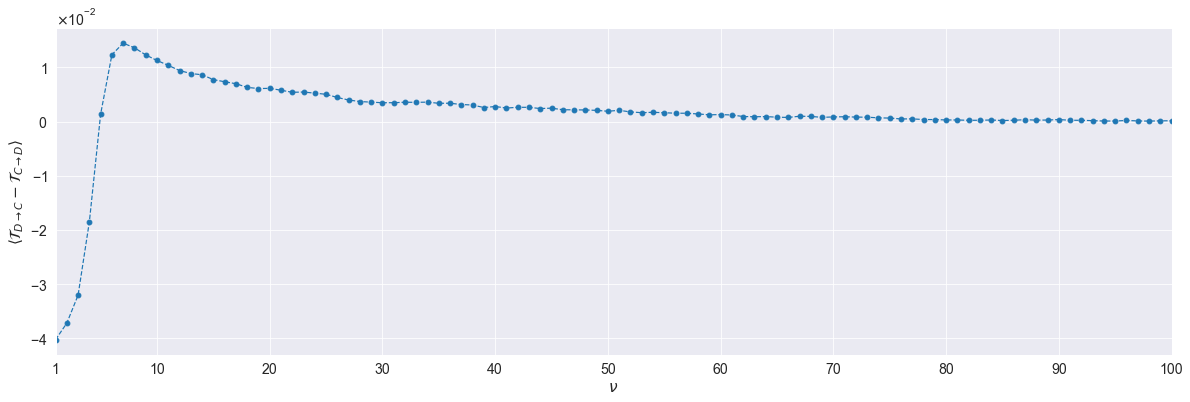

Experimento:  guyer
Diferencia:  ce-ec


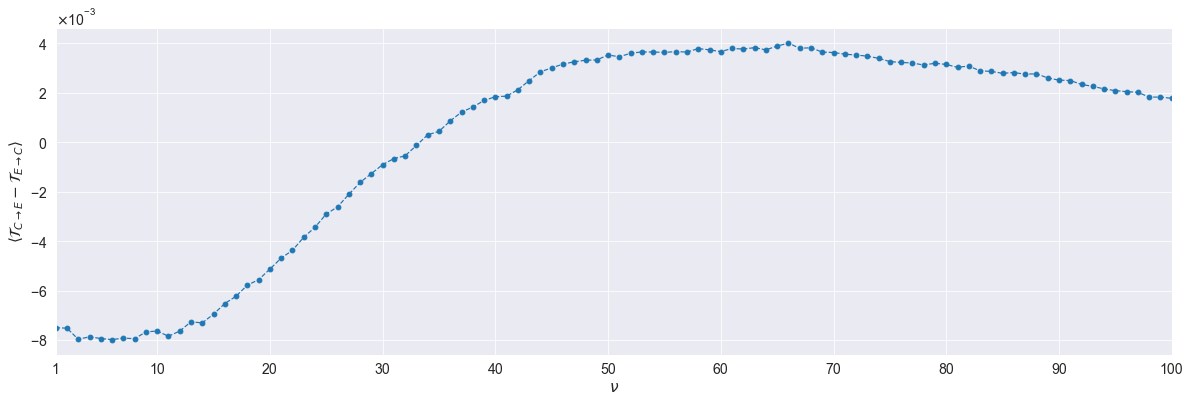

Experimento:  guyer
Diferencia:  ec-ce


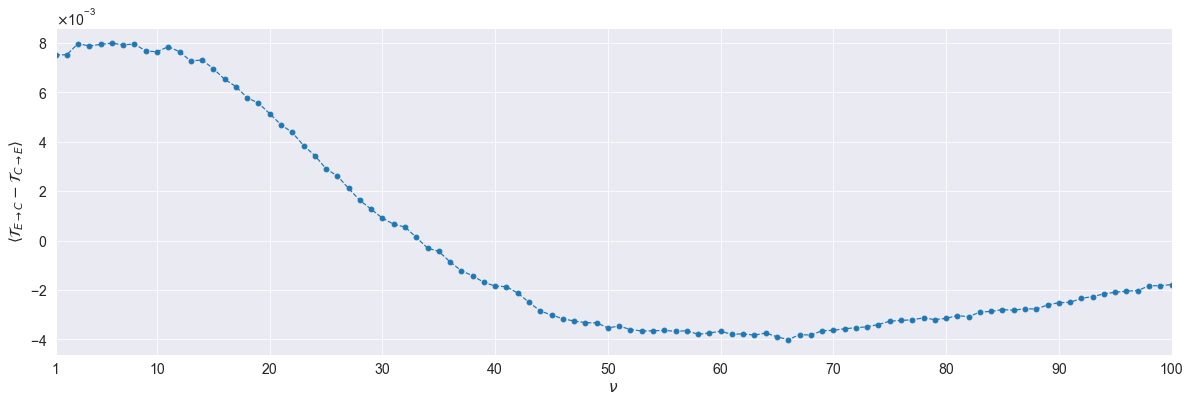

In [10]:
for exp in experimentos:
    for sen in sentidos:
        print("Experimento: ", exp)
        print("Sentido: ", sen)
        graficar_simple(exp, sen)
    for dif in diferencias:
        print("Experimento: ", exp)
        print("Diferencia: ", dif)
        graficar_diferencia(exp, dif)